In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
df=pd.read_csv("D:\\ExcelR\\multiple lin reg5\\50_Startups.csv")

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df1=df[['R&D Spend','Administration','Marketing Spend','Profit']]
df1.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [5]:
df1.rename(columns={'R&D Spend':'R_D','Marketing Spend':'M_S','Administration':'ADM'},inplace=True)

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   R_D     50 non-null     float64
 1   ADM     50 non-null     float64
 2   M_S     50 non-null     float64
 3   Profit  50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [7]:
df1.duplicated().sum()

0

In [8]:
df1.isna().sum()

R_D       0
ADM       0
M_S       0
Profit    0
dtype: int64

# Correlation Matrix

In [9]:
df1.corr()

,R_D,ADM,M_S,Profit
R_D,1.000000,0.241955,0.724248,0.972900
ADM,0.241955,1.000000,-0.032154,0.200717
M_S,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


# Scatterplot between variables along with histograms

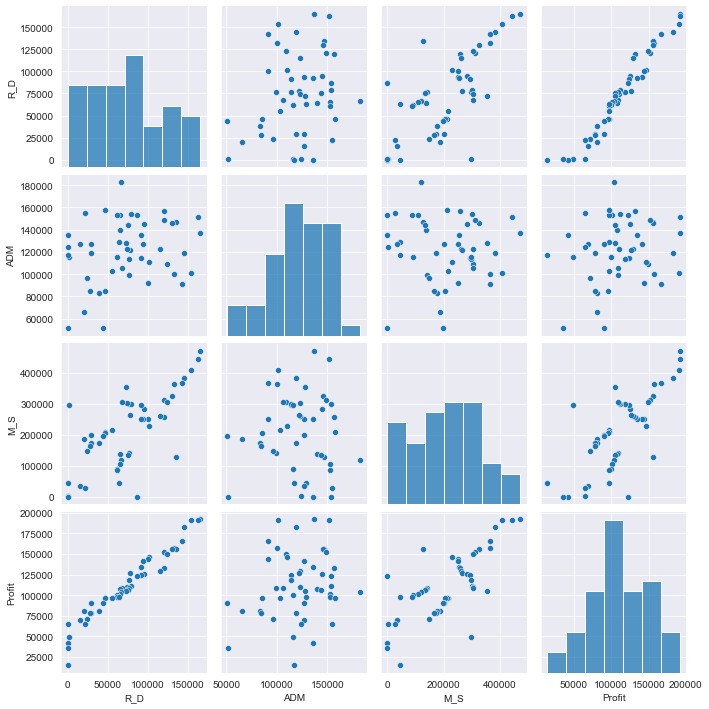

In [10]:
sns.set_style(style="darkgrid")
sns.pairplot(df1)

# model1

In [11]:
import statsmodels.formula.api as smf

In [12]:
model1=smf.ols('Profit~R_D+ADM+M_S',data=df1).fit()

In [13]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 15 Dec 2021   Prob (F-statistic):           4.53e-30
Time:                        16:47:24   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
R_D            0.8057      0.045     17.846      0.000       0.715       0.897
ADM           -0.0268      0.051     -0.526      0.602      -0.130       0.076
M_S            0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
# pvlaues of ADM and M_S are greater than 0.05 both are insignificant

In [15]:
model1_values=(model1.rsquared,model1.rsquared_adj,model1.aic)
model1_values

(0.9507459940683246, 0.9475337762901719, 1058.7714985998055)

# Simple Linear Regression for ADM & M_S

In [16]:
ML_ADM=smf.ols('Profit~ADM',data=df1).fit()

In [17]:
ML_ADM.pvalues

Intercept    0.003824
ADM          0.162217
dtype: float64

In [18]:
ML_MS=smf.ols('Profit~M_S',data=df1).fit()
ML_MS.pvalues

Intercept    4.294735e-10
M_S          4.381073e-10
dtype: float64

In [19]:
ML_MS_ADM=smf.ols('Profit~M_S+ADM',data=df1).fit()
np.round(ML_MS_ADM.pvalues,6)

Intercept    0.258934
M_S          0.000000
ADM          0.017292
dtype: float64

In [20]:
#pvalues when both are combine are less than 0.05


# calculate VIF

In [21]:
rsq_RD=smf.ols('R_D~ADM+M_S',data=df1).fit().rsquared
vif_RD=1/(1-rsq_RD)
rsq_ADM=smf.ols('ADM~R_D+M_S',data=df1).fit().rsquared
vif_ADM=1/(1-rsq_ADM)
rsq_M_S=smf.ols('M_S~R_D+ADM',data=df1).fit().rsquared
vif_M_S=1/(1-rsq_M_S)
d={'variables':['R_D','ADM','M_S'],"VIF":[vif_RD,vif_ADM,vif_M_S]}
VIF=pd.DataFrame(d)
VIF

,variables,VIF
0,R_D,2.468903
1,ADM,1.175091
2,M_S,2.326773


# Residual Analysis

# Test for Normality of Residuals (Q-Q Plot)

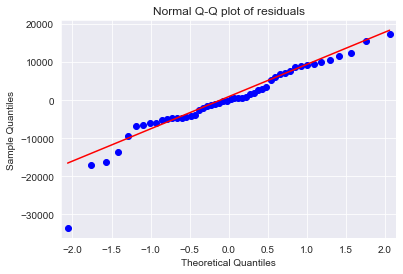

In [22]:
import statsmodels.api as sm
qqplot=sm.qqplot(model1.resid,line="q")
plt.title('Normal Q-Q plot of residuals')
plt.show()

In [23]:
#outliar from above QQ plot of residuals
list(np.where(model1.resid<-11000))

[array([14, 15, 48, 49], dtype=int64)]

# Residual Plot for Homoscedasticity

In [24]:
#standardized_values mend convert into z score =(x-u)/6
def get_standardized_values (vals):
    return (vals - vals.mean())/vals.std()

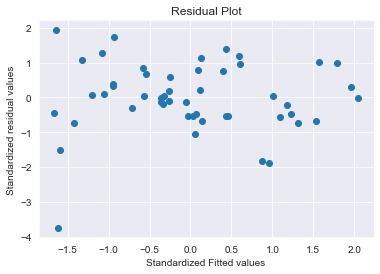

In [25]:
plt.scatter(get_standardized_values(model1.fittedvalues),
 get_standardized_values(model1.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()


In [26]:
#getting random cloud no patterm mean value =0,having constant varialbs
# shows outlies are there

In [27]:
#Residual Vs Regressors plots

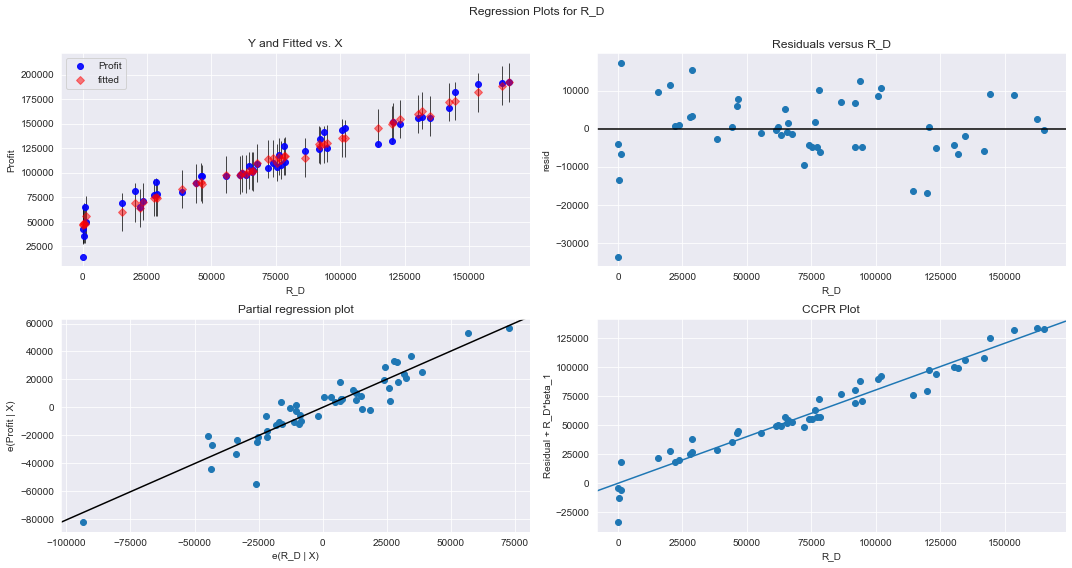

In [28]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "R_D", fig=fig)#its function used for Residual Vs Regressors plot
plt.show()


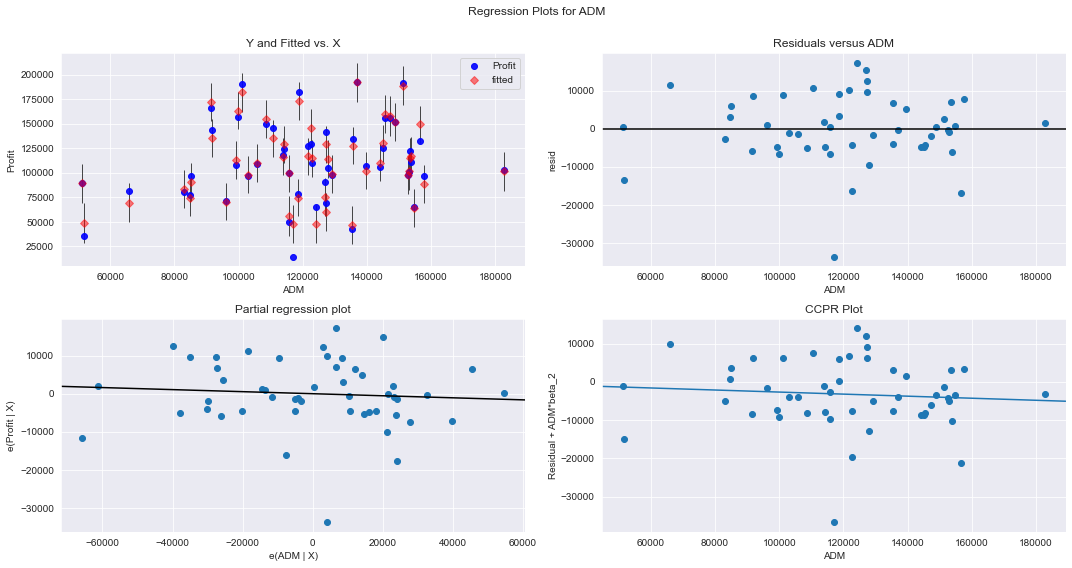

In [29]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "ADM", fig=fig)#its function used for Residual Vs Regressors plot
plt.show()

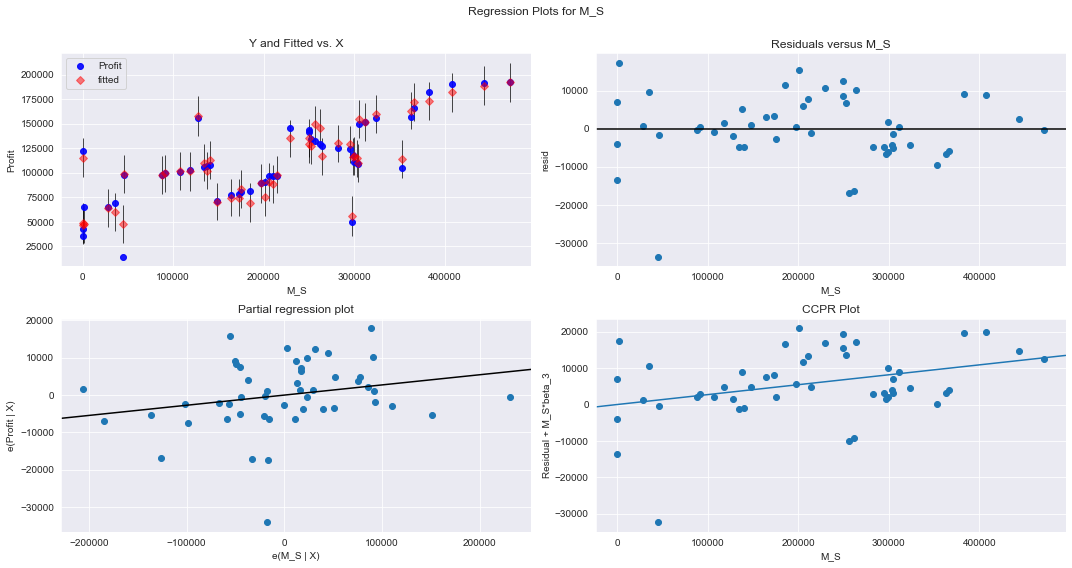

In [30]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "M_S", fig=fig)#its function used for Residual Vs Regressors plot
plt.show()

# Model Deletion Diagnostics

In [31]:
#Detecting Influencers/Outliers
#Cook’s Distance


In [32]:

model1_influence = model1.get_influence()
(c, _) = model1_influence.cooks_distance# (c, _) along with cooks dist get p vaues so, only store cooks values in c, 


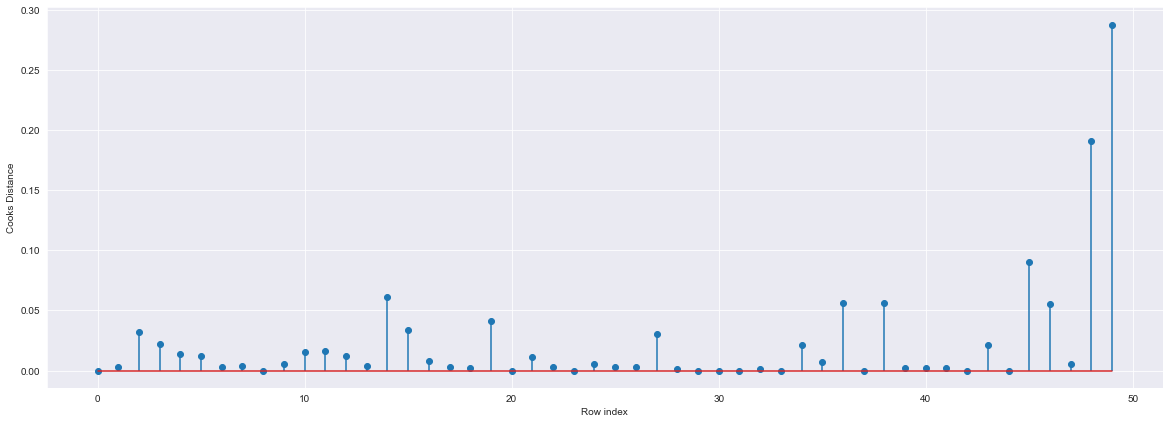

In [33]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()


In [34]:
# Influensing Data point
(np.argmax(c),np.max(c))


(49, 0.28808229275432634)

# High Influence points

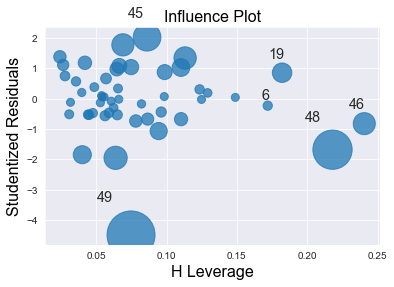

In [35]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model1)
plt.show()

In [36]:
#From the above plot, it is evident that data point 49,48,46 are the influencers

In [37]:
df1[df1.index.isin([49,48])]

,R_D,ADM,M_S,Profit
48,542.05,51743.15,0.00,35673.41
49,0.00,116983.80,45173.06,14681.40


In [38]:
# Droping the influensing DataPoint

In [39]:
new_df=df1.drop(df1.index[[49,48]],axis=0).reset_index()
new_df.tail()

,index,R_D,ADM,M_S,Profit
43,43,15505.73,127382.30,35534.17,69758.98
44,44,22177.74,154806.14,28334.72,65200.33
45,45,1000.23,124153.04,1903.93,64926.08
46,46,1315.46,115816.21,297114.46,49490.75
47,47,0.00,135426.92,0.00,42559.73


In [40]:
#Drop the original index ,because index to arrange properly after removing 49,48
new_df1=new_df.drop(['index'],axis=1)
new_df1.tail()

,R_D,ADM,M_S,Profit
43,15505.73,127382.30,35534.17,69758.98
44,22177.74,154806.14,28334.72,65200.33
45,1000.23,124153.04,1903.93,64926.08
46,1315.46,115816.21,297114.46,49490.75
47,0.00,135426.92,0.00,42559.73


In [41]:
# Buliding reggresioin model after removing most influencing DataPoint
model2=smf.ols('Profit~R_D+ADM+M_S',data=new_df1).fit()
model2_values=(model2.rsquared,model2.rsquared_adj,model2.aic)
model2_values

(0.9626766170294073, 0.960131840917776, 994.6690439260116)

In [42]:
#Again check for influencers
model2_influence = model2.get_influence()
(c, _) = model2_influence.cooks_distance

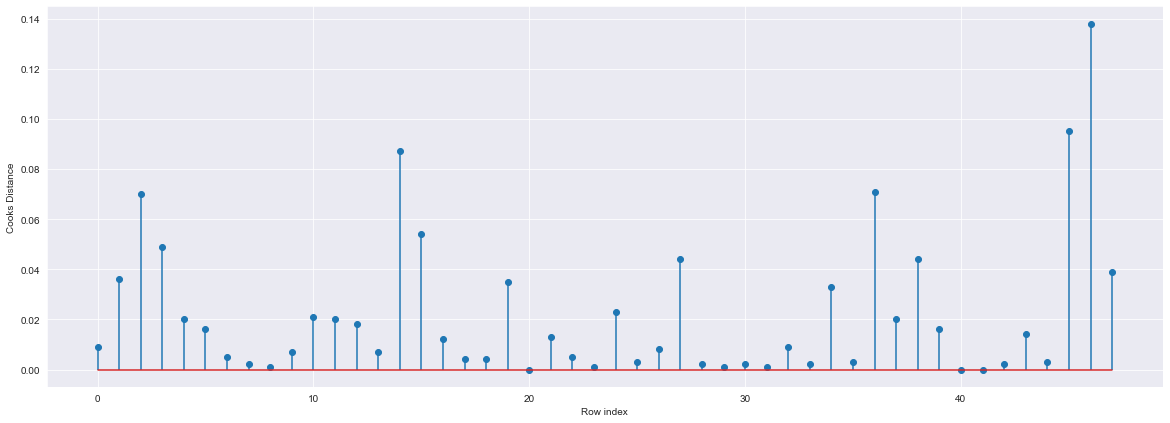

In [43]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(new_df1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [44]:
# Influensing Data point
(np.argmax(c),np.max(c))

(46, 0.13829133994334772)

In [45]:
# high influence points

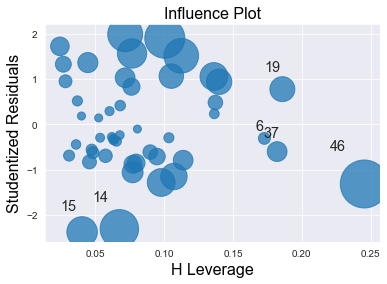

In [46]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model2)
plt.show()

In [47]:
# Droping the influensing DataPoint
new_df2=new_df1.drop(new_df1.index[[46]],axis=0).reset_index()
new_df2.tail()

,index,R_D,ADM,M_S,Profit
42,42,23640.93,96189.63,148001.11,71498.49
43,43,15505.73,127382.30,35534.17,69758.98
44,44,22177.74,154806.14,28334.72,65200.33
45,45,1000.23,124153.04,1903.93,64926.08
46,47,0.00,135426.92,0.00,42559.73


In [48]:
new_df3=new_df2.drop(['index'],axis=1)
new_df3.tail()

,R_D,ADM,M_S,Profit
42,23640.93,96189.63,148001.11,71498.49
43,15505.73,127382.30,35534.17,69758.98
44,22177.74,154806.14,28334.72,65200.33
45,1000.23,124153.04,1903.93,64926.08
46,0.00,135426.92,0.00,42559.73


In [49]:
# Buliding reggresioin model after removing most influencing DataPoint
model3=smf.ols('Profit~R_D+ADM+M_S',data=new_df3).fit()
model3_values=(model3.rsquared,model3.rsquared_adj,model3.aic)
model3_values

(0.9614129113440602, 0.9587207888796923, 973.2489443962857)

In [50]:
model_values_df=pd.DataFrame({'model 1':model1_values,'model 2':model2_values,'Final Model':model3_values},index=['rsquared','rsquared_adj','AIC'])
model_values_df

,model 1,model 2,Final Model
rsquared,0.950746,0.962677,0.961413
rsquared_adj,0.947534,0.960132,0.958721
AIC,1058.771499,994.669044,973.248944


# Predicting for new data

In [51]:
new_data=pd.DataFrame({'R_D':23640.93,"ADM":96189.63,"M_S":148001.11},index=[0])
new_data

,R_D,ADM,M_S
0,23640.93,96189.63,148001.11


In [52]:
model3.predict(new_data)

0    74891.654066
dtype: float64

In [53]:
model3.predict(new_df3)#prediction for all data set

0     189144.021141
1     185571.505316
2     180343.992254
3     171860.489927
4     171153.336127
5     162804.123770
6     156477.343357
7     158187.870039
8     150255.251593
9     154352.656745
10    135977.904080
11    136546.022058
12    129455.572750
13    127661.509729
14    147998.542616
15    145793.706944
16    118010.693099
17    129938.578129
18    129669.713023
19    116105.658621
20    117938.402714
21    117474.656407
22    115854.360943
23    111858.337361
24    115352.079636
25    103683.989930
26    111491.723852
27    115392.974943
28    101954.513645
29    102912.662101
30    101740.441122
31     99040.236547
32    100968.977775
33    100540.396562
34     90608.105042
35     94025.014882
36     78421.052027
37     94122.405580
38     74828.161109
39     87671.677996
40     78232.195211
41     79164.837264
42     74891.654066
43     64193.943484
44     67653.399768
45     52436.773768
46     51024.934949
dtype: float64